### 데이터분석 파일

##### feature 설명
- 'Bib':  단순 id / 동명이인 등을 구분하기 위함
- 'Age_group' → 19: 19세 이하 / 70: 70세 이상 / 20~69세의 경우 → 29: 25~29세
- ‘M/F’ → Man = 0 / Woman = 1 
- 'Country' = 국적
- '5p' → 출발로부터 5km까지 기준 pace[sec/km](sec)
- '15p' → 10km부터 15km까지 기준 pace[sec/km](sec)
- 'Final_Time’ → 풀코스(42.195km) 완주 기록(sec) 
- ‘Sub’ → sub-3,4,5,6,7을 숫자로만 표현 / 3 = 완주기록 3시간 미만(sec)
- '5k' → 출발로부터 5km되었을때의 시간 기록(sec)
- '15k' → 출발로부터 15km되었을때의 시간 기록(sec)
- ‘Dataset’ → 사용 데이터셋 구분 [B: 보스턴 마라톤 / C: 시카고 / M: 모스크바]
- ‘Year’ → 해당 데이터의 년도

In [1]:
import pandas as pd

# CSV 불러오기
df = pd.read_csv('./real_final/FINAL_marathons_with_weather.csv')

#5개 랜덤 샘플
sample = df.sample(n=5, random_state=42)
print("=== 5개 랜덤 샘플 ===")
print(sample)


=== 5개 랜덤 샘플 ===
         Bib  Age_group  M/F Country     5p    10p         15p       Halfp  \
29701  29702         44    0     USA  264.0  262.0  262.000000  263.000000   
98188  18423         34    0     DEN  296.6  294.7  294.800000  294.726863   
95113  16611         44    0     CRC  288.6  283.5  282.400000  282.829719   
65692  65693         49    0     USA  298.0  299.0  300.000000  303.000000   
90981  17336         34    0     USA  250.6  250.6  251.066667  250.124422   

          25p         30p  ...     15K    Half     25K     30K      35K  \
29701  264.00  268.000000  ...  3932.0  5554.0  6614.0  8049.0   9569.0   
98188  295.16  296.366667  ...  4422.0  6218.0  7379.0  8891.0  10633.0   
95113  283.00  284.200000  ...  4236.0  5967.0  7075.0  8526.0  10022.0   
65692  306.00  310.000000  ...  4507.0  6410.0  7654.0  9328.0  11119.0   
90981  250.60  252.200000  ...  3766.0  5277.0  6265.0  7566.0   8912.0   

           40K  Dataset  Year  temperature_race  humidity_race 

In [3]:
print(df.info())
#결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114612 entries, 0 to 114611
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Bib               114612 non-null  int64  
 1   Age_group         114612 non-null  int64  
 2   M/F               114612 non-null  int64  
 3   Country           114612 non-null  object 
 4   5p                114489 non-null  float64
 5   10p               114596 non-null  float64
 6   15p               114600 non-null  float64
 7   Halfp             114604 non-null  float64
 8   25p               114605 non-null  float64
 9   30p               114606 non-null  float64
 10  35p               114607 non-null  float64
 11  40p               114607 non-null  float64
 12  Final_Time        114612 non-null  float64
 13  Sub               114612 non-null  int64  
 14  5K                114489 non-null  float64
 15  10K               114596 non-null  float64
 16  15K               11

In [2]:
#기초 통계량 (count, mean, std, min, 25%, 50%, 75%, max)
print("\n=== 기초 통계량(summary) ===")
print(df.describe())


=== 기초 통계량(summary) ===
                 Bib      Age_group            M/F             5p  \
count  114612.000000  114612.000000  114612.000000  114489.000000   
mean    36705.212596      43.432564       0.430592     306.783852   
std     25889.225890      11.210433       0.495161      47.058159   
min         1.000000      19.000000       0.000000     173.200000   
25%     14327.000000      34.000000       0.000000     273.000000   
50%     30378.500000      44.000000       0.000000     302.000000   
75%     59031.250000      49.000000       1.000000     334.200000   
max     87684.000000      70.000000       1.000000     804.000000   

                 10p            15p          Halfp            25p  \
count  114596.000000  114600.000000  114604.000000  114605.000000   
mean      306.632991     307.921122     310.155825     315.288650   
std        47.216042      48.358126      49.572410      54.388013   
min         6.000000     172.600000     172.911482      23.000000   
25%     

In [4]:
#전체 피처·타깃 결측 확인 (optional)
print("\n=== 전체 데이터셋 결측 개수 ===")
print(df.isna().sum())


=== 전체 데이터셋 결측 개수 ===
Bib                   0
Age_group             0
M/F                   0
Country               0
5p                  123
10p                  16
15p                  12
Halfp                 8
25p                   7
30p                   6
35p                   5
40p                   5
Final_Time            0
Sub                   0
5K                  123
10K                  16
15K                  12
Half                  8
25K                   7
30K                   6
35K                   5
40K                   5
Dataset               0
Year                  0
temperature_race      0
humidity_race         0
dtype: int64


In [7]:
import pandas as pd


# 1) 보스턴 구간 경계점 고도 (m)
boundary_alt = {
    0.0: 149,
    5.0:  72,
    10.0: 55,
    15.0: 46,
    20.0: 46, #half
    25.0: 40,
    30.0: 18,
    35.0: 40,
    40.0: 18,
}

# 2) 5km 구간별 “순고도 변화(가중치)” 계산
#    → boundary_alt 딕셔너리에서 바로 (end – (end – 5)) 로 계산
seg_ends = [5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0]
seg_weights = {
    end: boundary_alt[end] - boundary_alt[end - 5.0]
    for end in seg_ends
}

# 3) 새로운 컬럼(wt_5K, wt_10K, …, wt_40K) 초기화 (0으로 채움)
for end in seg_ends:
    col_name = f"wt_{int(end)}K"
    df[col_name] = 0.0

# 4) “보스턴 데이터셋” 행(‘Dataset’ == 'B')에만 가중치 채워넣기
mask_boston = (df["Dataset"] == "B")
for end, w in seg_weights.items():
    col_name = f"wt_{int(end)}K"
    # 보스턴 행에만 해당 세그먼트 가중치 w 할당
    df.loc[mask_boston, col_name] = w

# 5) 결과 확인
#    - 보스턴 행에서 새로 생성된 wt_*K 컬럼들만 출력
cols_to_show = [f"wt_{int(e)}K" for e in seg_ends]
print("=== 보스턴 데이터셋의 wt_*K 컬럼값(상위 5개 행) ===")
print(df.loc[mask_boston, cols_to_show].head())

# 6) 보스턴이 아닌(non-B) 행 중에서 5개 랜덤 샘플 출력 (확인용)
non_b_sample = df[df["Dataset"] != "B"].sample(n=5, random_state=42)
print("\n=== 보스턴 아닌 행에서 5개 랜덤 샘플 ===")
print(non_b_sample)

=== 보스턴 데이터셋의 wt_*K 컬럼값(상위 5개 행) ===
   wt_5K  wt_10K  wt_15K  wt_20K  wt_25K  wt_30K  wt_35K  wt_40K
0  -77.0   -17.0    -9.0     0.0    -6.0   -22.0    22.0   -22.0
1  -77.0   -17.0    -9.0     0.0    -6.0   -22.0    22.0   -22.0
2  -77.0   -17.0    -9.0     0.0    -6.0   -22.0    22.0   -22.0
3  -77.0   -17.0    -9.0     0.0    -6.0   -22.0    22.0   -22.0
4  -77.0   -17.0    -9.0     0.0    -6.0   -22.0    22.0   -22.0

=== 보스턴 아닌 행에서 5개 랜덤 샘플 ===
          Bib  Age_group  M/F Country     5p    10p         15p       Halfp  \
101856  24294         29    0     USA  389.8  384.8  375.600000  368.337481   
85355   85356         49    0     RUS  310.0  308.0  306.000000  307.000000   
95077   24393         24    0     USA  305.4  305.9  302.133333  301.030928   
91597   21175         34    0     USA  243.8  247.1  245.666667  245.289726   
95169    6393         59    0     JPN  274.2  275.1  275.800000  276.288660   

           25p         30p  ...  temperature_race  humidity_race  wt_

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# macOS 한글 폰트 설정
mpl.rcParams['font.family'] = 'AppleGothic'
# 마이너스 기호 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

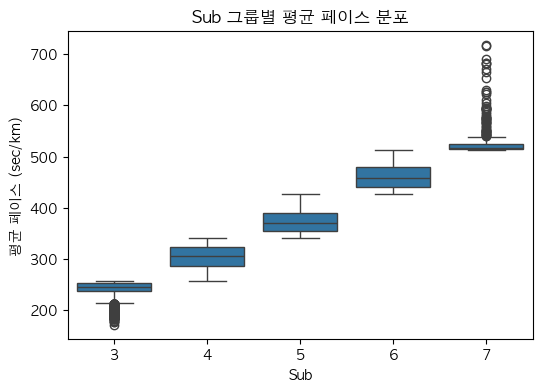

In [9]:
#1. Sub(목표 그룹)별 전체 완주 페이스 비교
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Sub', y=df['Final_Time'] / 42.195)
plt.ylabel('평균 페이스 (sec/km)')
plt.title('Sub 그룹별 평균 페이스 분포')
plt.show()

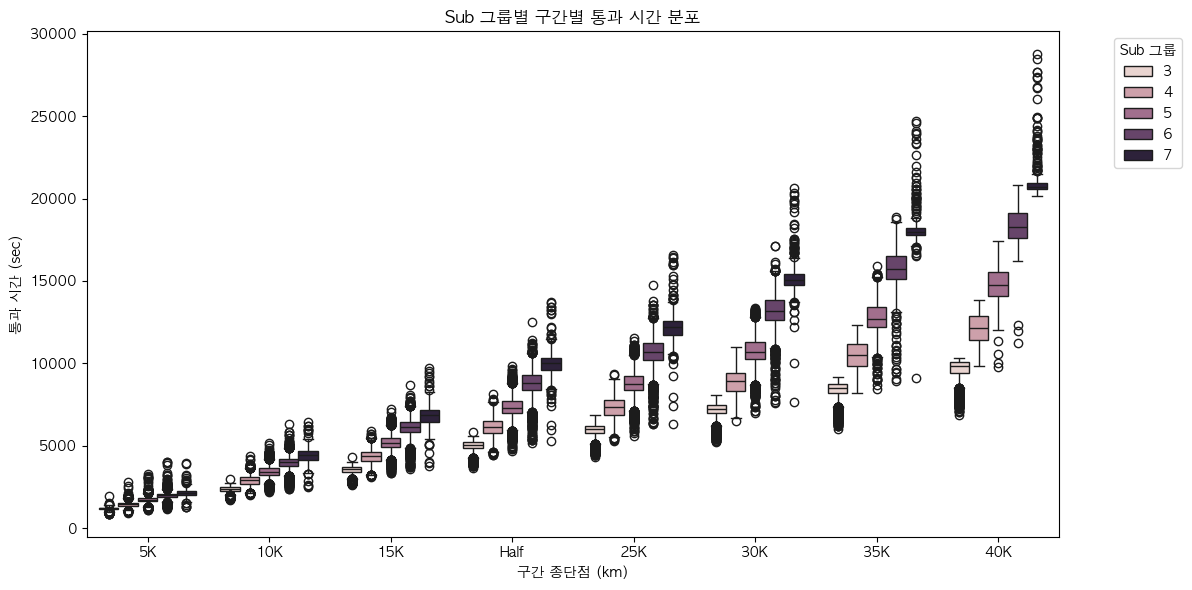

In [14]:
#2-2. Sub 그룹별 구간별 통과 시간 분포

# 1) 필요한 컬럼만 melt
segments = ['5K','10K','15K','Half','25K','30K','35K','40K']
df_melt = df.melt(
    id_vars='Sub',
    value_vars=segments,
    var_name='Segment',
    value_name='Time'
)

# 2) Segment 순서 지정
df_melt['Segment'] = pd.Categorical(
    df_melt['Segment'],
    categories=segments,
    ordered=True
)

plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_melt,
    x='Segment', y='Time',
    hue='Sub'
)
plt.title('Sub 그룹별 구간별 통과 시간 분포')
plt.xlabel('구간 종단점 (km)')
plt.ylabel('통과 시간 (sec)')
plt.legend(title='Sub 그룹', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


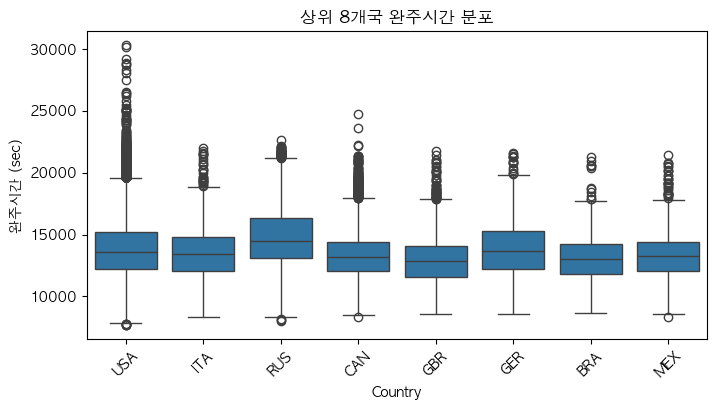

In [16]:
#3-1. 국가(Country)별 완주 기록 차이 (상위)
top_countries = df['Country'].value_counts().index[:8]
plt.figure(figsize=(8,4))
sns.boxplot(data=df[df['Country'].isin(top_countries)],
            x='Country', y='Final_Time')
plt.xticks(rotation=45)
plt.ylabel('완주시간 (sec)')
plt.title('상위 8개국 완주시간 분포')
plt.show()

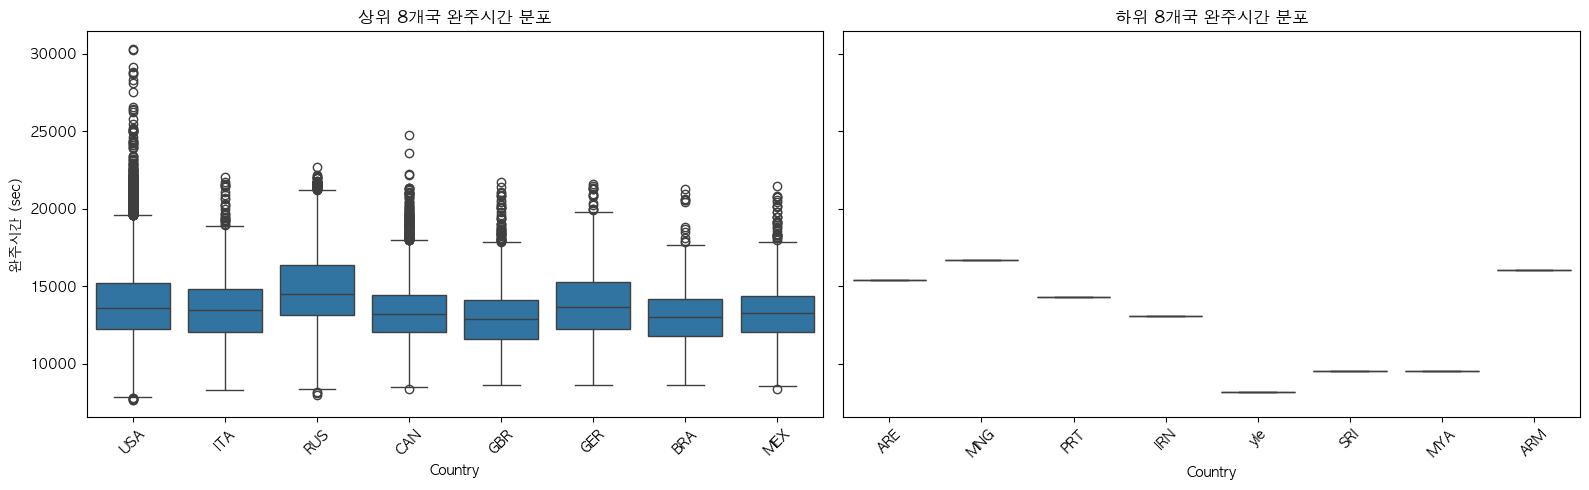

In [17]:
#3-2. 국가(Country)별 완주 기록 차이 (상하위)
# 1) 상위 8개국 / 하위 8개국 리스트 생성
country_counts = df['Country'].value_counts()
top8    = country_counts.index[:8]
bottom8 = country_counts.index[-8:]

# 2) 플롯 그리기
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

# 상위 8개국
sns.boxplot(
    data=df[df['Country'].isin(top8)],
    x='Country', y='Final_Time',
    ax=axes[0]
)
axes[0].set_title('상위 8개국 완주시간 분포')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('완주시간 (sec)')

# 하위 8개국
sns.boxplot(
    data=df[df['Country'].isin(bottom8)],
    x='Country', y='Final_Time',
    ax=axes[1]
)
axes[1].set_title('하위 8개국 완주시간 분포')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

동양 국가별 참가자 수:
Country
JPN    756
CHN    736
HKG    444
KOR    379
TPE    124
Name: count, dtype: int64


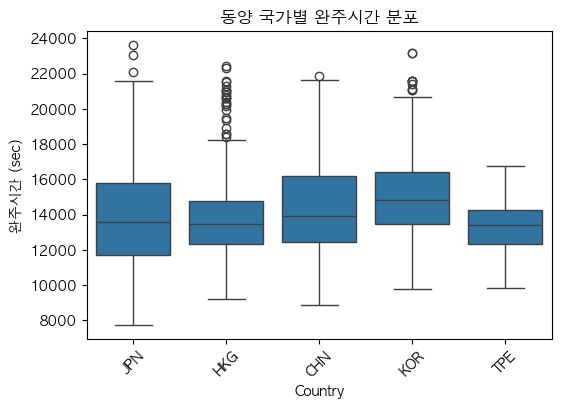

In [18]:
#3-3. 국가(Country)별 완주 기록 차이 (동양)
# 1) 동양 국가 코드 리스트 정의
eastern_countries = ['KOR', 'JPN', 'CHN', 'TPE', 'HKG']

# 2) 동양 국가만 필터링
df_east = df[df['Country'].isin(eastern_countries)].copy()

# 3) 간단히 참가자 수 확인
print("동양 국가별 참가자 수:")
print(df_east['Country'].value_counts())

# 4) 완주시간 분포 박스플롯
plt.figure(figsize=(6,4))
sns.boxplot(data=df_east, x='Country', y='Final_Time')
plt.xticks(rotation=45)
plt.title('동양 국가별 완주시간 분포')
plt.ylabel('완주시간 (sec)')
plt.show()


=== 그룹별 완주시간 기초통계 ===
             n     mean(sec)  median(sec)     std(sec)
group                                                 
Bottom       8  12838.000000      13683.5  3324.502970
East      2439  14220.539565      13816.0  2699.129206
Top     102281  13893.740587      13600.0  2389.668347


/var/folders/2g/9_1xks7j21j8_vjr52g7g8hr0000gn/T/ipykernel_81113/2692999921.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df3, x='group', y='Final_Time',


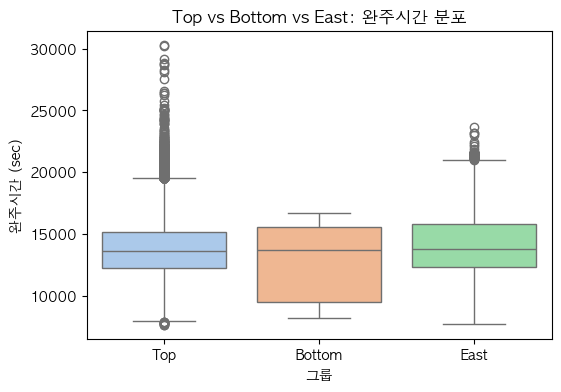

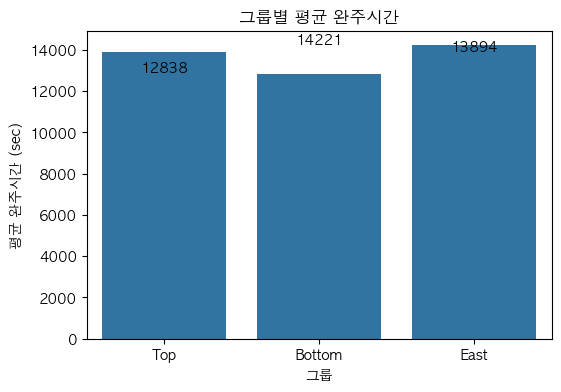

In [19]:
#3-4. 국가(Country)별 완주 기록 차이 (상위, 하위, 동양 비교)
# 1) 그룹별 국가 코드 정의
country_counts = df['Country'].value_counts()
top8    = set(country_counts.index[:8])
bottom8 = set(country_counts.index[-8:])
east_asia = {'KOR','JPN','CHN','TPE','HKG'}  # 필요시 더 추가

# 2) 각 행에 group 라벨 할당
def label_group(c):
    if c in top8:
        return 'Top'
    if c in bottom8:
        return 'Bottom'
    if c in east_asia:
        return 'East'
    return None

df['group'] = df['Country'].map(label_group)

# 3) 관심 있는 세 그룹만 필터
df3 = df[df['group'].notna()].copy()

# 4) 기초통계: 평균·중앙값·표준편차
stats = df3.groupby('group')['Final_Time'] \
           .agg(['count','mean','median','std']) \
           .rename(columns={'count':'n','mean':'mean(sec)','median':'median(sec)','std':'std(sec)'})
print("=== 그룹별 완주시간 기초통계 ===")
print(stats)

# 5) 박스플롯으로 분포 비교
plt.figure(figsize=(6,4))
sns.boxplot(data=df3, x='group', y='Final_Time',
            order=['Top','Bottom','East'],
            palette='pastel')
plt.title('Top vs Bottom vs East: 완주시간 분포')
plt.xlabel('그룹')
plt.ylabel('완주시간 (sec)')
plt.show()

# 6) 평균·중앙값 막대그래프
plt.figure(figsize=(6,4))
sns.barplot(x=stats.index, y=stats['mean(sec)'], order=['Top','Bottom','East'])
for i, v in enumerate(stats['mean(sec)']):
    plt.text(i, v+50, f"{v:.0f}", ha='center')
plt.title('그룹별 평균 완주시간')
plt.ylabel('평균 완주시간 (sec)')
plt.xlabel('그룹')
plt.show()



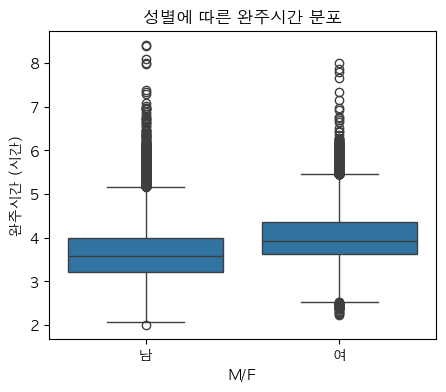

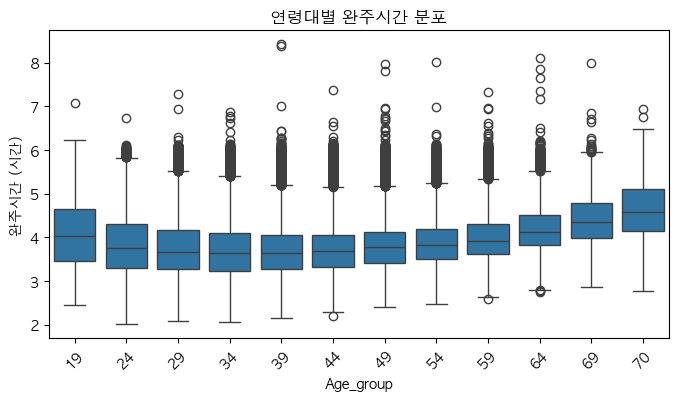

In [20]:
#4. 성별・연령대별 완주 페이스

# 1) Final_Time을 시간, 분 단위로 추가
df['Finish_Hours'] = df['Final_Time'] / 3600       # 시간 단위
df['Finish_Minutes'] = df['Final_Time'] / 60       # 분 단위

# ——— (A) 성별에 따른 완주시간 분포 ———
plt.figure(figsize=(5,4))
sns.boxplot(data=df, x='M/F', y='Finish_Hours')
plt.xticks([0,1], ['남','여'])
plt.ylabel('완주시간 (시간)')
plt.title('성별에 따른 완주시간 분포')
plt.show()

# ——— (B) 연령대에 따른 완주시간 분포 ———
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Age_group', y='Finish_Hours')
plt.xticks(rotation=45)
plt.ylabel('완주시간 (시간)')
plt.title('연령대별 완주시간 분포')
plt.show()

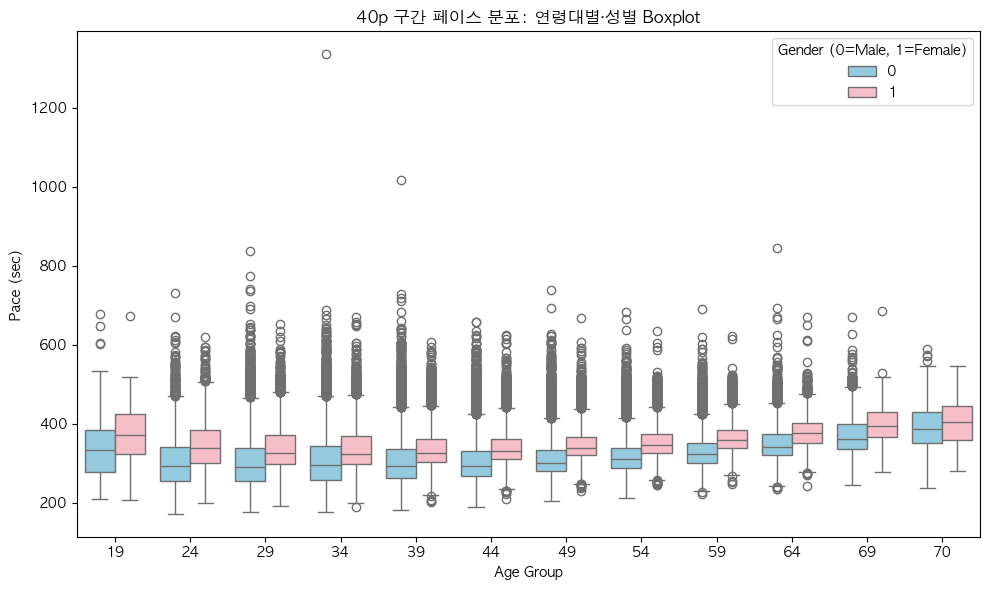

/opt/anaconda3/envs/datasci/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/envs/datasci/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/envs/datasci/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/envs/datasci/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing 

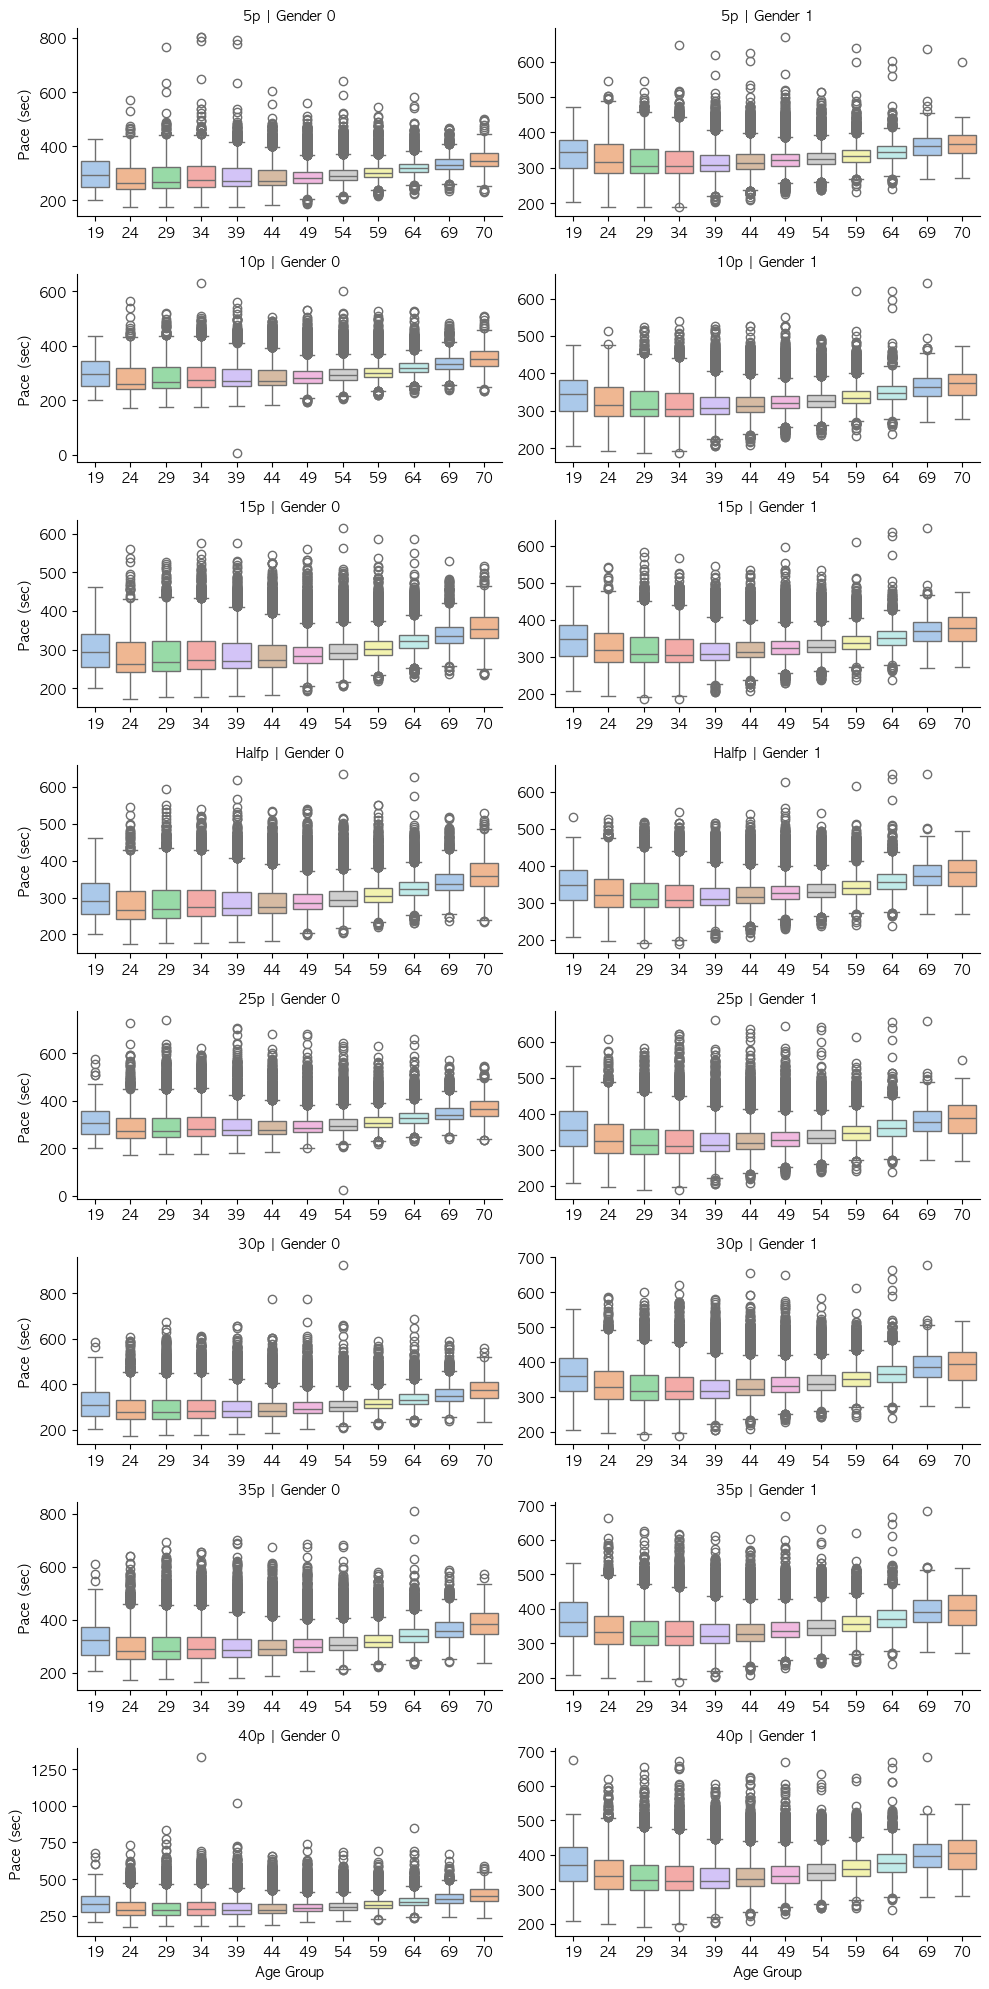


=== Segment × Age_group × Gender (std of Pace) ===
M/F                        0          1
Segment Age_group                      
10p     19         56.346832  53.454933
        24         53.533195  49.892294
        29         53.013752  47.905849
        34         52.182520  46.726110
        39         47.833396  41.118253
...                      ...        ...
Halfp   54         41.313585  36.095874
        59         38.731404  36.118110
        64         37.744788  38.561894
        69         39.540879  43.189958
        70         48.933226  50.581637

[96 rows x 2 columns]

=== Segment × Age_group t-test (Male vs Female) – Significant 여부 ===
Segment     10p   15p   25p   30p   35p    40p    5p  Halfp
Age_group                                                  
19         True  True  True  True  True   True  True   True
24         True  True  True  True  True   True  True   True
29         True  True  True  True  True   True  True   True
34         True  True  True  True  

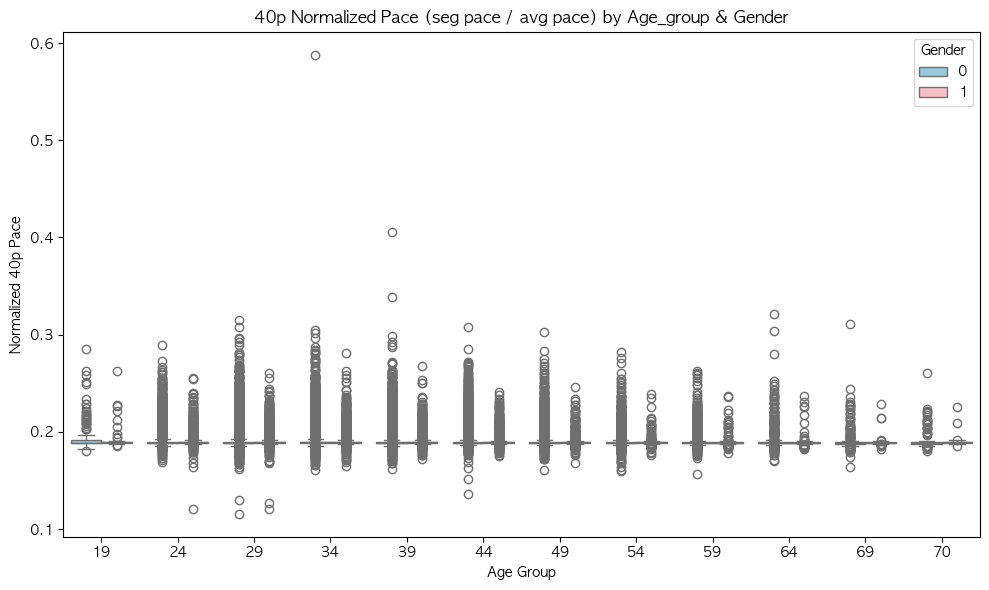


=== Normalized Pace by Age_group × Gender ===
                5p_norm  10p_norm  15p_norm  Halfp_norm  25p_norm  30p_norm  \
Age_group M/F                                                                 
19        0    0.174238  0.173392  0.174613    0.174931  0.182417  0.185069   
          1    0.174912  0.175118  0.176409    0.178808  0.183277  0.185674   
24        0    0.177205  0.176388  0.176746    0.177583  0.181946  0.184309   
          1    0.178897  0.178321  0.178956    0.180443  0.182776  0.185045   
29        0    0.179588  0.178770  0.178932    0.179281  0.183577  0.185205   
          1    0.180123  0.179878  0.180388    0.181568  0.183645  0.185504   
34        0    0.180031  0.179405  0.179599    0.179773  0.184490  0.185695   
          1    0.179725  0.179659  0.180266    0.181437  0.183831  0.185748   
39        0    0.179447  0.178861  0.179207    0.179747  0.183569  0.185040   
          1    0.179327  0.179170  0.179826    0.181119  0.183105  0.185175   
44   

/opt/anaconda3/envs/datasci/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



=== Cluster × Age_group Distribution ===
Age_group     19    24    29    34    39    44    49    54    59    64    69  \
pace_cluster                                                                   
0             93  1881  5202  5835  6764  7694  8466  6793  5089  3156  1053   
1             76  1119  2452  2502  2248  2215  1939  1603  1222  1053   666   
2             81  2261  6299  7208  7622  7511  6891  4267  1902   494   102   

Age_group      70  
pace_cluster       
0             310  
1             380  
2              40  

=== Cluster × Gender Distribution ===
M/F               0      1
pace_cluster              
0             23311  29025
1              7583   9892
2             34295  10383


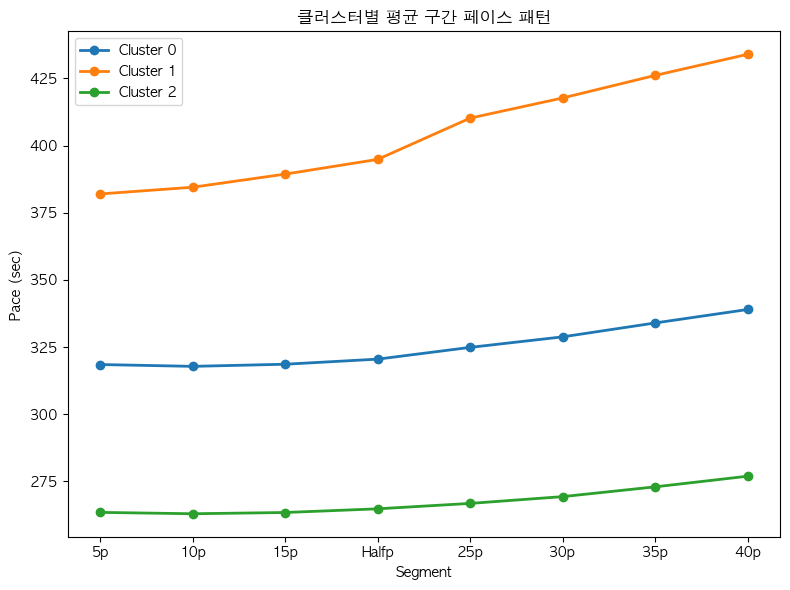

<Figure size 800x400 with 0 Axes>

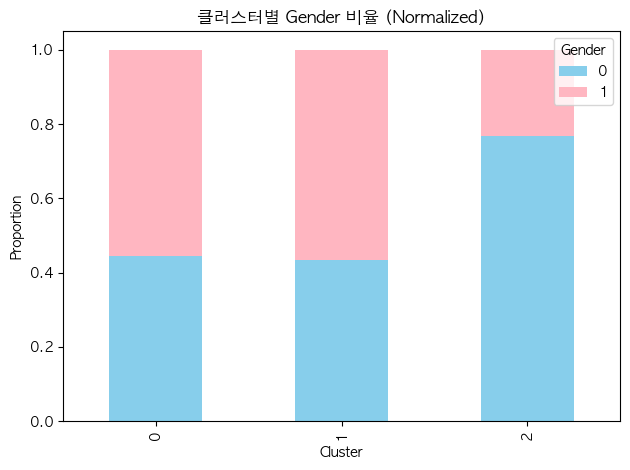

<Figure size 1000x600 with 0 Axes>

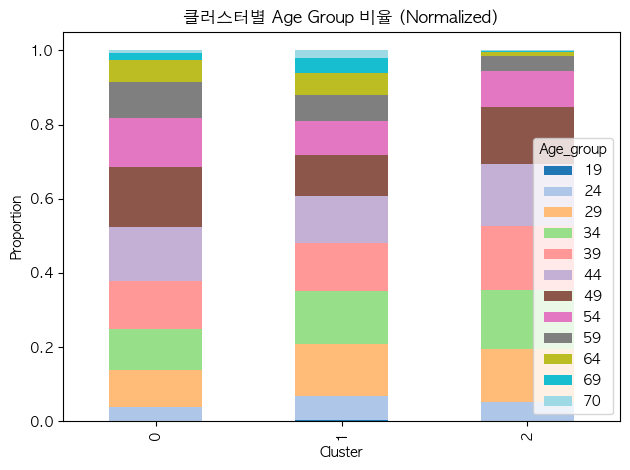

In [51]:
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#4-1. 성별 , 연령별 페이스 분석 advance

# 1) 구간별 페이스 컬럼 목록
pace_cols = ["5p", "10p", "15p", "Halfp", "25p", "30p", "35p", "40p"]

# ——————————————————————————————————————————————————————————————
# 2) Boxplot: “연령대 × 성별” 구간별 페이스 분산 비교
# ——————————————————————————————————————————————————————————————

# 2-1) 데이터 긴 형태(Long Format)로 변환
df_long = df.melt(
    id_vars=["Age_group", "M/F"],
    value_vars=pace_cols,
    var_name="Segment",
    value_name="Pace"
)

# 2-2) 예시: 40p 구간 “연령대별·성별 Boxplot”
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_long[df_long["Segment"] == "40p"],
    x="Age_group",
    y="Pace",
    hue="M/F",
    palette=["skyblue", "lightpink"]
)
plt.title("40p 구간 페이스 분포: 연령대별·성별 Boxplot")
plt.xlabel("Age Group")
plt.ylabel("Pace (sec)")
plt.legend(title="Gender (0=Male, 1=Female)")
plt.tight_layout()
plt.show()

# 2-3) 모든 구간을 한 번에 보고 싶다면 FacetGrid 사용 (옵션)
g = sns.FacetGrid(
    df_long, 
    row="Segment", 
    col="M/F", 
    sharex=False, 
    sharey=False, 
    height=2.5, 
    aspect=2
)
g.map_dataframe(sns.boxplot, x="Age_group", y="Pace", palette="pastel")
g.set_axis_labels("Age Group", "Pace (sec)")
g.set_titles(row_template="{row_name}", col_template="Gender {col_name}")
plt.tight_layout()
plt.show()

# 2-4) 연령대·성별 구간별 표준편차 계산 & print
std_table = df_long.groupby(["Segment", "Age_group", "M/F"])["Pace"].std().unstack().fillna(0)
print("\n=== Segment × Age_group × Gender (std of Pace) ===")
print(std_table)


# ——————————————————————————————————————————————————————————————
# 3) 통계적 유의성 검정: “각 연령대별” 남녀 간 페이스 차이 (t-test)
# ——————————————————————————————————————————————————————————————
ttest_results = []
for seg in pace_cols:
    for age in sorted(df["Age_group"].unique()):
        male_vals = df[(df["M/F"] == 0) & (df["Age_group"] == age)][seg].dropna()
        female_vals = df[(df["M/F"] == 1) & (df["Age_group"] == age)][seg].dropna()
        # 최소 각 그룹 샘플 수 5개 이상 있어야 검정 가능
        if len(male_vals) >= 5 and len(female_vals) >= 5:
            tstat, pval = ttest_ind(male_vals, female_vals, equal_var=False)
            significant = (pval < 0.05)
            ttest_results.append({
                "Segment": seg,
                "Age_group": age,
                "p-value": pval,
                "Significant": significant
            })
        else:
            ttest_results.append({
                "Segment": seg,
                "Age_group": age,
                "p-value": np.nan,
                "Significant": False
            })

ttest_df = pd.DataFrame(ttest_results)
# 피벗 테이블 형태로 표시: index=Age_group, columns=Segment, 값은 “유의미 여부”
pivot_signif = ttest_df.pivot(
    index="Age_group",
    columns="Segment",
    values="Significant"
)
print("\n=== Segment × Age_group t-test (Male vs Female) – Significant 여부 ===")
print(pivot_signif)


# ——————————————————————————————————————————————————————————————
# 4) 회귀분석: “Age_group × 성별 상호작용” 검정 (예시: 40p 구간)
# ——————————————————————————————————————————————————————————————
df_reg = df.dropna(subset=["Age_group", "M/F", "40p"]).copy()

# OLS 회귀 모델: 40p ~ Age_group * (M/F)
model = smf.ols("Q('40p') ~ Age_group * Q('M/F')", data=df_reg).fit()

# 회귀 결과를 텍스트로 출력 (lxml 없이 가능)
print("\n=== Regression Summary: 40p Pace ~ Age_group * Gender ===")
print(model.summary())

# (원한다면 아래처럼 계수만 별도 출력 가능)
print("\n=== Coefficients ===")
print(model.params)
print("\n=== p-values ===")
print(model.pvalues)

# ——————————————————————————————————————————————————————————————
# 5) 정규화된 페이스 지표 생성 & 분석
#    - 세그먼트당 평균 페이스 = Final_Time / 8
#    - 정규화된 페이스 = 세그먼트 페이스 / (Final_Time/8)
# ——————————————————————————————————————————————————————————————
df_norm = df.dropna(subset=pace_cols + ["Final_Time"]).copy()
df_norm["Avg_per_segment"] = df_norm["Final_Time"] / 8

for seg in pace_cols:
    df_norm[f"{seg}_norm"] = df_norm[seg] / df_norm["Avg_per_segment"]

# 5-1) 40p_norm에 대한 연령대·성별 Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_norm,
    x="Age_group",
    y="40p_norm",
    hue="M/F",
    palette=["skyblue", "lightpink"]
)
plt.title("40p Normalized Pace (seg pace / avg pace) by Age_group & Gender")
plt.xlabel("Age Group")
plt.ylabel("Normalized 40p Pace")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

# 5-2) 연령대×성별별 정규화된 페이스 평균 출력
norm_table = df_norm.groupby(["Age_group", "M/F"])[[f"{seg}_norm" for seg in pace_cols]].mean()
print("\n=== Normalized Pace by Age_group × Gender ===")
print(norm_table)

# ——————————————————————————————————————————————————————————————
# 6) 클러스터별(실력별) 연령·성별 패턴 비교
# ——————————————————————————————————————————————————————————————
df_cluster = df.dropna(subset=pace_cols + ["Final_Time", "Age_group", "M/F"]).copy()
X = df_cluster[pace_cols].values
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster["pace_cluster"] = kmeans.fit_predict(X)

# 클러스터별 Age_group 분포 & Gender 분포 출력
cluster_age_dist = df_cluster.groupby(["pace_cluster", "Age_group"])["pace_cluster"].count().unstack(fill_value=0)
cluster_gender_dist = df_cluster.groupby(["pace_cluster", "M/F"])["pace_cluster"].count().unstack(fill_value=0)

print("\n=== Cluster × Age_group Distribution ===")
print(cluster_age_dist)
print("\n=== Cluster × Gender Distribution ===")
print(cluster_gender_dist)

# 클러스터별 평균 패턴 시각화
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=pace_cols)
cluster_centers["cluster"] = cluster_centers.index

plt.figure(figsize=(8, 6))
for i, row in cluster_centers.iterrows():
    plt.plot(
        pace_cols,
        row[pace_cols],
        marker="o",
        linewidth=2,
        label=f"Cluster {int(row['cluster'])}"
    )
plt.title("클러스터별 평균 구간 페이스 패턴")
plt.xlabel("Segment")
plt.ylabel("Pace (sec)")
plt.legend()
plt.tight_layout()
plt.show()

# 클러스터별 성별 비율 (정규화된 막대그래프)
cluster_gender_dist_norm = cluster_gender_dist.div(cluster_gender_dist.sum(axis=1), axis=0)
plt.figure(figsize=(8, 4))
cluster_gender_dist_norm.plot(
    kind="bar",
    stacked=True,
    color=["skyblue", "lightpink"]
)
plt.title("클러스터별 Gender 비율 (Normalized)")
plt.xlabel("Cluster")
plt.ylabel("Proportion")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

# 클러스터별 연령대 비율 (정규화된 막대그래프)
cluster_age_dist_norm = cluster_age_dist.div(cluster_age_dist.sum(axis=1), axis=0)
plt.figure(figsize=(10, 6))
cluster_age_dist_norm.plot(kind="bar", stacked=True, colormap="tab20")
plt.title("클러스터별 Age Group 비율 (Normalized)")
plt.xlabel("Cluster")
plt.ylabel("Proportion")
plt.tight_layout()
plt.show()


== 날씨·환경 vs 구간별 페이스 상관계수 ==
                        5p       10p       15p     Halfp       25p       30p  \
temperature_race -0.053325 -0.041079 -0.044775 -0.035937 -0.072579 -0.068319   
humidity_race     0.045791  0.022280  0.005774 -0.028675 -0.003663 -0.035837   

                       35p       40p  
temperature_race -0.069672 -0.076668  
humidity_race    -0.058957 -0.053219  


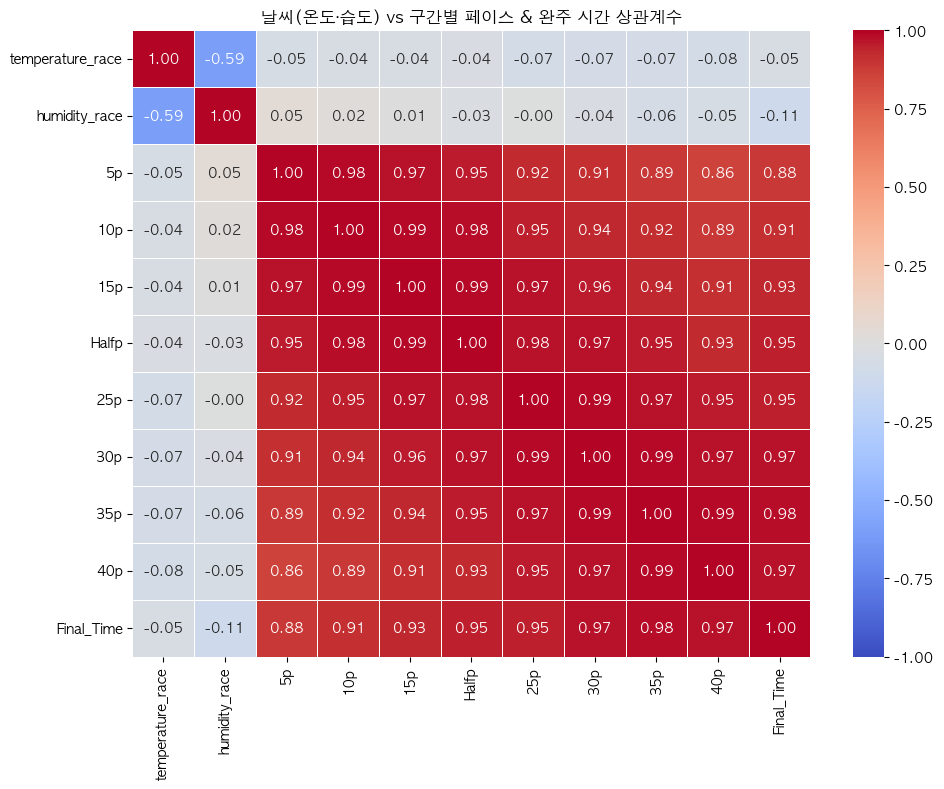

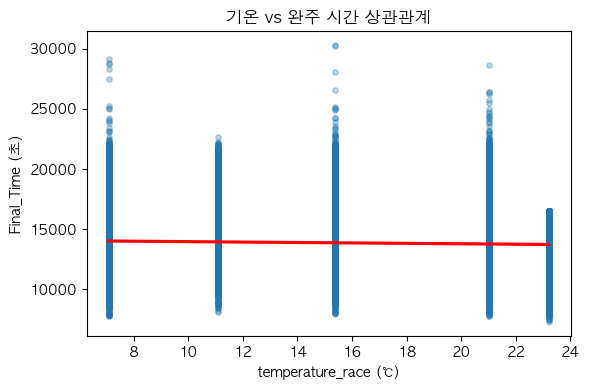

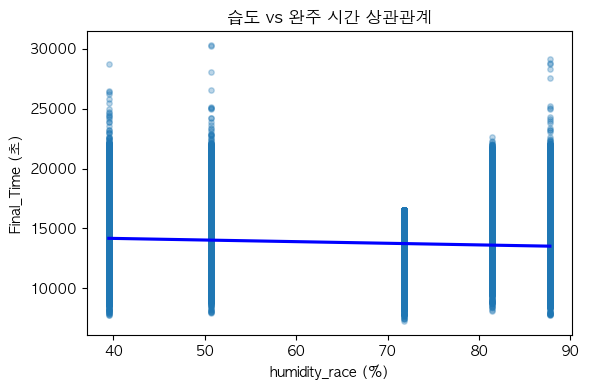

In [23]:
#5. 환경 변수(온도, 습도) vs 페이스 상관

#1) 상관계수 계산
corr_cols = ["temperature_race", "humidity_race", "5p", "10p", "15p", "Halfp", "25p", "30p", "35p", "40p"]
corr_matrix = df[corr_cols].corr()
print("\n== 날씨·환경 vs 구간별 페이스 상관계수 ==")
print(corr_matrix.loc[["temperature_race", "humidity_race"], ["5p", "10p", "15p", "Halfp", "25p", "30p", "35p", "40p"]])



# 2) 상관관계를 보고 싶은 컬럼들
corr_cols = [
    "temperature_race", "humidity_race",
    "5p", "10p", "15p", "Halfp", "25p", "30p", "35p", "40p",
    "Final_Time"
]

# 3) 상관계수 계산
corr_matrix = df[corr_cols].corr()

# 4) 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,        # 셀에 숫자 표시
    fmt=".2f",         # 소수점 둘째 자리까지 표시
    cmap="coolwarm",   # 컬러맵 지정
    vmin=-1, vmax=1,   # 상관계수 범위
    linewidths=0.5,    # 셀 사이 경계선 두께
    linecolor="white"  # 셀 경계선 색상
)
plt.title("날씨(온도·습도) vs 구간별 페이스 & 완주 시간 상관계수")
plt.tight_layout()
plt.show()

# 5) 산점도 + 회귀선 (기온 vs 완주 시간)
plt.figure(figsize=(6, 4))
sns.regplot(
    data=df,
    x="temperature_race",
    y="Final_Time",
    scatter_kws={"s": 15, "alpha": 0.3},
    line_kws={"color": "red"}
)
plt.title("기온 vs 완주 시간 상관관계")
plt.xlabel("temperature_race (℃)")
plt.ylabel("Final_Time (초)")
plt.tight_layout()
plt.show()

# 6) 산점도 + 회귀선 (습도 vs 완주 시간)
plt.figure(figsize=(6, 4))
sns.regplot(
    data=df,
    x="humidity_race",
    y="Final_Time",
    scatter_kws={"s": 15, "alpha": 0.3},
    line_kws={"color": "blue"}
)
plt.title("습도 vs 완주 시간 상관관계")
plt.xlabel("humidity_race (%)")
plt.ylabel("Final_Time (초)")
plt.tight_layout()
plt.show()



=== 엘리트 그룹(Sub < 8000) 전체: 온도·습도 vs Final_Time 상관계수 ===
                  Final_Time
temperature_race   -0.045810
humidity_race      -0.105676


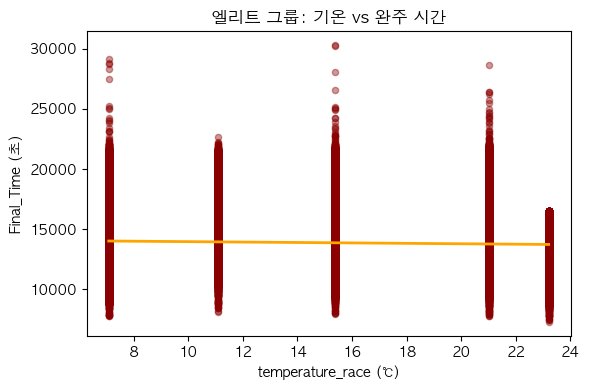

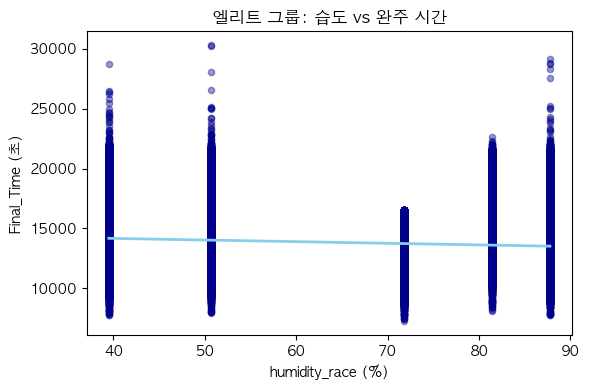

In [27]:
#5-1. 환경 변수(온도, 습도) vs 페이스 상관 advance
#비슷한 실력군으로 제한

race_list = df["Dataset"].unique()


# 1) 엘리트 그룹(Sub < 8000초) 분석
# -----------------------------------
elite_df = df[df["Sub"] < 8000].copy()
if not elite_df.empty:
    print("\n=== 엘리트 그룹(Sub < 8000) 전체: 온도·습도 vs Final_Time 상관계수 ===")
    corr_cols_elite = ["temperature_race", "humidity_race", "Final_Time"]
    corr_matrix_elite = elite_df[corr_cols_elite].corr()
    print(corr_matrix_elite.loc[["temperature_race", "humidity_race"], ["Final_Time"]])

    # (1) 기온 vs 완주 시간 (엘리트)
    plt.figure(figsize=(6, 4))
    sns.regplot(
        data=elite_df,
        x="temperature_race",
        y="Final_Time",
        scatter_kws={"s": 20, "alpha": 0.4, "color": "darkred"},
        line_kws={"color": "orange", "linewidth": 2}
    )
    plt.title("엘리트 그룹: 기온 vs 완주 시간")
    plt.xlabel("temperature_race (℃)")
    plt.ylabel("Final_Time (초)")
    plt.tight_layout()
    plt.show()

    # (2) 습도 vs 완주 시간 (엘리트)
    plt.figure(figsize=(6, 4))
    sns.regplot(
        data=elite_df,
        x="humidity_race",
        y="Final_Time",
        scatter_kws={"s": 20, "alpha": 0.4, "color": "darkblue"},
        line_kws={"color": "skyblue", "linewidth": 2}
    )
    plt.title("엘리트 그룹: 습도 vs 완주 시간")
    plt.xlabel("humidity_race (%)")
    plt.ylabel("Final_Time (초)")
    plt.tight_layout()
    plt.show()
else:
    print("엘리트 그룹(Sub < 8000) 데이터가 없습니다.")


In [21]:
# 6-1 도시(Dataset)별 평균 페이스 비교 (예: Boston vs 나머지)
city_stats = df.groupby("Dataset")[["5p", "40p"]].mean().reset_index()
print("\n== Dataset별(도시별) 5p & 40p 평균 페이스 ==")
print(city_stats)


== Dataset별(도시별) 5p & 40p 평균 페이스 ==
  Dataset          5p         40p
0       B  305.055986  329.646188
1       C  302.839560  309.342263
2       M  334.928580  388.619673


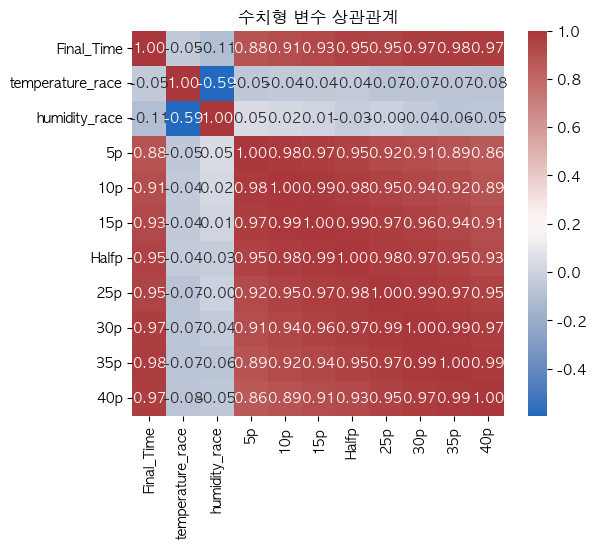

In [33]:
#7. 전체 수치형 Feature 상관관계 히트맵
num_cols = ['Final_Time', 'temperature_race','humidity_race'] + pace_cols
plt.figure(figsize=(6,5))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='vlag')
plt.title('수치형 변수 상관관계')
plt.show()

1. 구간별 Pace 상관관계

5p,10p,…,40p (혹은 pace_*로 재계산했다면 그 값들) 가 서로 0.86~0.99 사이의 매우 높은 상관을 보입니다.

즉, 초반 페이스가 빠르면 거의 끝까지 일관되게 빠른 경향이 있습니다.

2. Final_Time vs Pace

모든 구간 Pace와 Final_Time(풀코스 총 완주 시간)은 0.89~0.98 의 매우 강한 양(+)의 상관을 가집니다.

전체 완주 시간은 곧 5km 구간 페이스들의 합(또는 평균)이므로 당연히 높게 나옵니다.

3. 온도·습도 영향

temperature_race 와 Final_Time 은 약 –0.09 (약한 음의 상관),

humidity_race 와 Final_Time 은 약 –0.07 로,

두 환경 변수는 페이스와도 거의 상관이 없습니다.

다만 온도와 습도끼리는 –0.97 로 매우 강한 음(–)의 상관을 보이는데, 이는 데이터 수집 환경(높은 온도일수록 상대습도가 낮게 기록됨)을 반영하는 듯합니다.

결론: 이 데이터에선 “누가 빠른지”는 전 구간 페이스가 강하게 묶여 있고, 환경 요인(온도·습도)은 페이스나 완주 시간에 미미한 영향만 줍니다.
따라서 모델에 넣을 때는 구간별 pace 와 Final_Time 은 중복 정보이니 하나만 쓰거나, PCA 등으로 차원 축소를 고려하는 게 좋습니다.

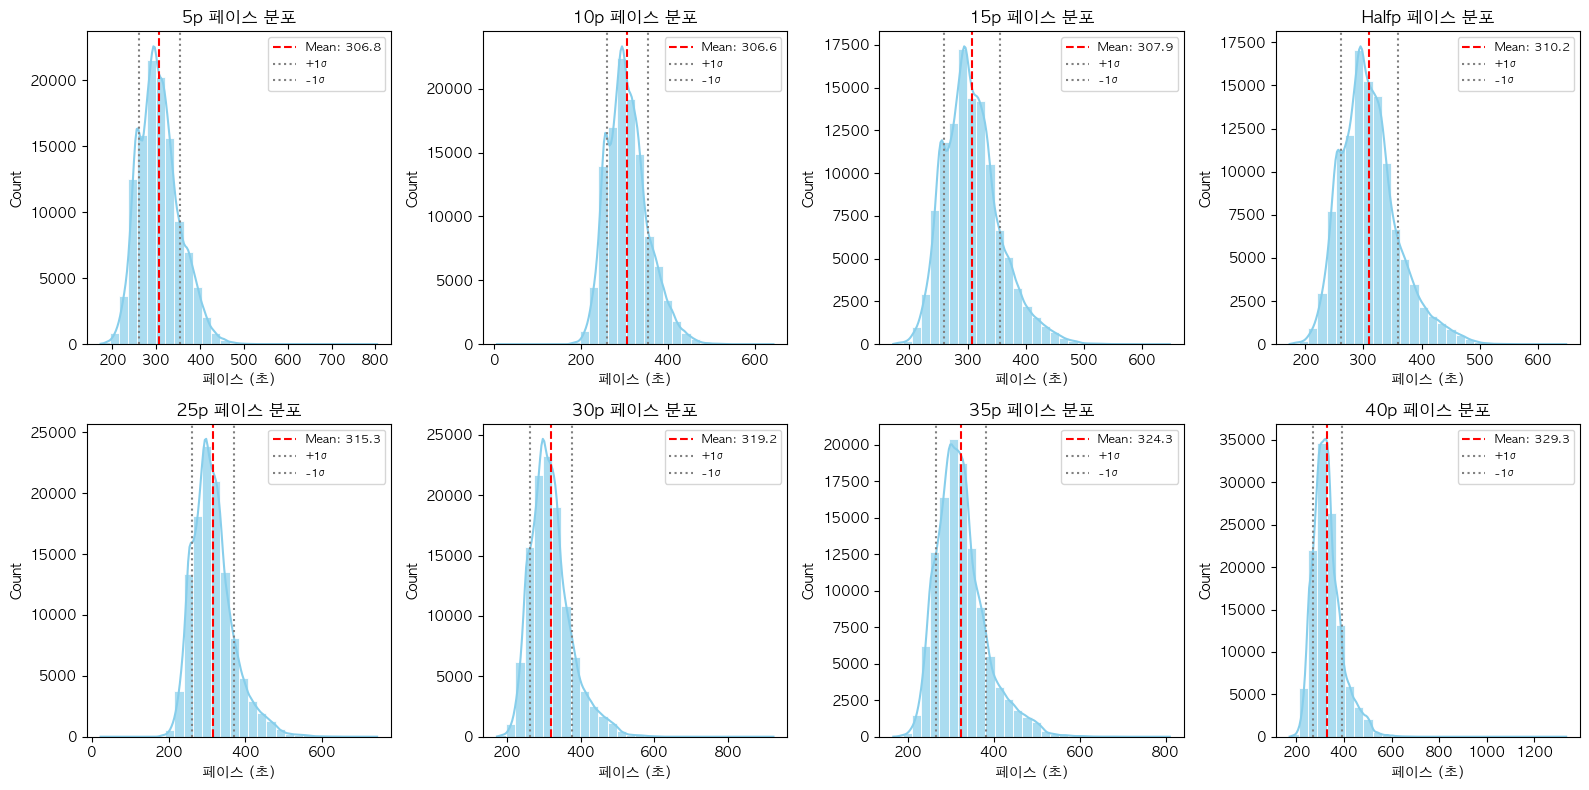

/var/folders/2g/9_1xks7j21j8_vjr52g7g8hr0000gn/T/ipykernel_81113/2297417502.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/2g/9_1xks7j21j8_vjr52g7g8hr0000gn/T/ipykernel_81113/2297417502.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


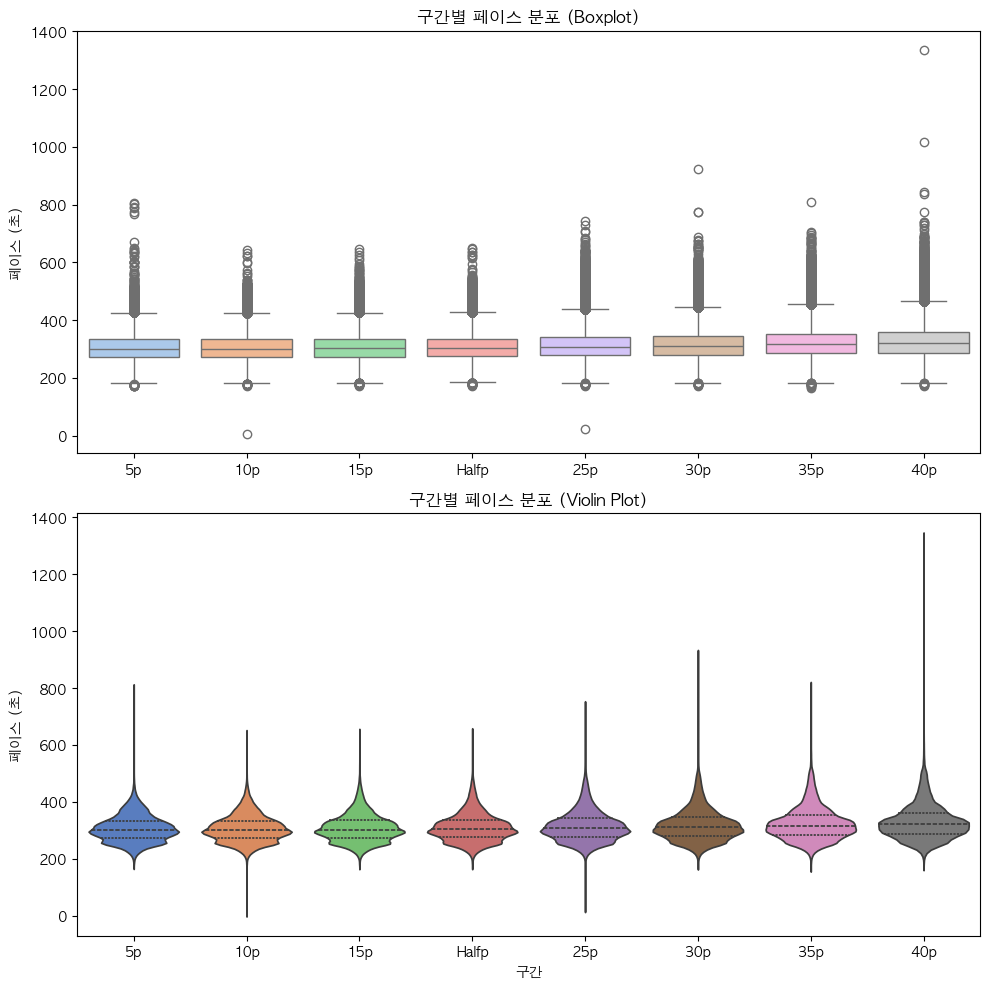

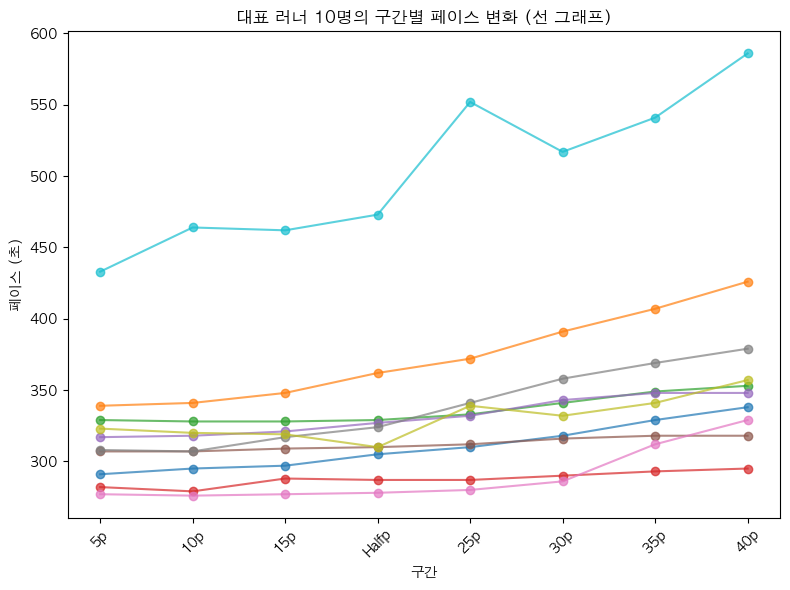

/opt/anaconda3/envs/datasci/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


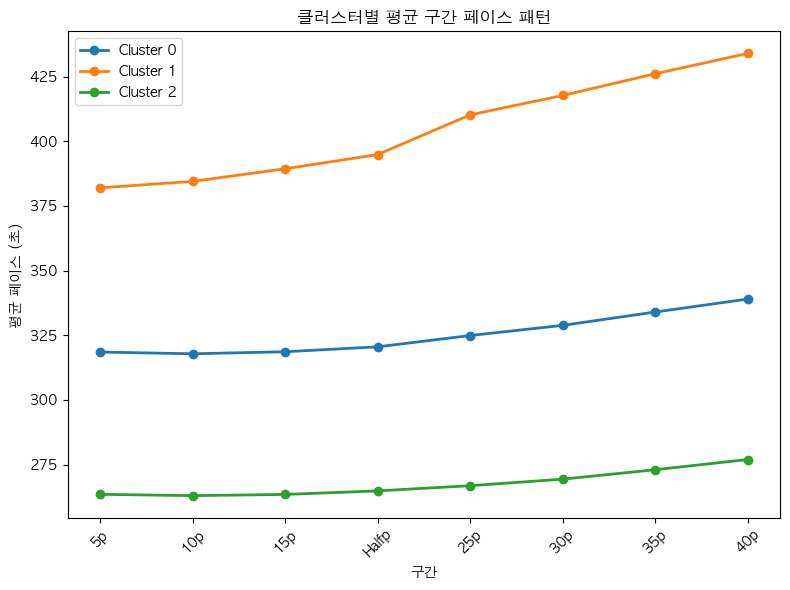

=== 클러스터별 완주시간 통계 ===
   pace_cluster     mean_time  median_time  count
0             0  14289.702060      14158.0  52336
1             1  17916.647382      17600.0  17475
2             2  11733.267022      11852.0  44678


/var/folders/2g/9_1xks7j21j8_vjr52g7g8hr0000gn/T/ipykernel_81113/2297417502.py:150: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


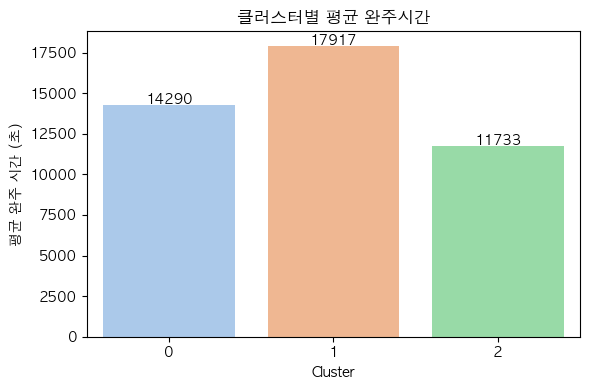

In [42]:
from sklearn.cluster import KMeans
#8 구간 간 페이스 변화 패턴 탐색

# 구간별 페이스 컬럼 목록
pace_cols = ["5p", "10p", "15p", "Halfp", "25p", "30p", "35p", "40p"]

# ——————————————————————————————————————————————————————————————
# 2) 페이스(속도) 분포 살펴보기
#    • 전체 구간별 히스토그램 + KDE
#    • 구간별 Boxplot, Violin Plot
#    → “구간이 진행될수록 평균·분산이 바뀐다” 증명
# ——————————————————————————————————————————————————————————————

# 2.1 히스토그램 + KDE (5p ~ 40p)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()

for ax, col in zip(axes, pace_cols):
    sns.histplot(
        data=df[col].dropna(),
        kde=True,
        bins=30,
        color="skyblue",
        edgecolor="white",
        alpha=0.7,
        ax=ax
    )
    mean_val = df[col].mean()
    std_val = df[col].std()
    ax.axvline(mean_val, color="red", linestyle="--", label=f"Mean: {mean_val:.1f}")
    ax.axvline(mean_val + std_val, color="gray", linestyle=":", label="+1σ")
    ax.axvline(mean_val - std_val, color="gray", linestyle=":", label="-1σ")
    ax.set_title(f"{col} 페이스 분포")
    ax.set_xlabel("페이스 (초)")
    ax.set_ylabel("Count")
    ax.legend(loc="upper right", fontsize="small")

plt.tight_layout()
plt.show()


# 2.2 Boxplot & Violin Plot (모든 구간을 한 번에 비교)
#     데이터프레임을 “긴 형태(long form)”으로 변환
# Boxplot과 Violin Plot을 한 화면(2행 1열)으로 배치
df_long = df.melt(id_vars=[], value_vars=pace_cols, var_name="Segment", value_name="Pace")

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# (1) Boxplot
sns.boxplot(
    data=df_long,
    x="Segment", y="Pace",
    palette="pastel",
    order=pace_cols,
    ax=axes[0]
)
axes[0].set_title("구간별 페이스 분포 (Boxplot)")
axes[0].set_xlabel("")
axes[0].set_ylabel("페이스 (초)")

# (2) Violin Plot
sns.violinplot(
    data=df_long,
    x="Segment", y="Pace",
    inner="quartile",
    palette="muted",
    order=pace_cols,
    ax=axes[1]
)
axes[1].set_title("구간별 페이스 분포 (Violin Plot)")
axes[1].set_xlabel("구간")
axes[1].set_ylabel("페이스 (초)")

plt.tight_layout()
plt.show()



# ——————————————————————————————————————————————————————————————
# 3) 구간 간 페이스 변화 패턴 탐색
#    • 3.1) 대표 샘플 10명 꺾은선 그래프
#    • 3.2) KMeans 클러스터링 → 클러스터별 평균 페이스곡선 + 완주시간 비교
# ——————————————————————————————————————————————————————————————

# 3.1 대표 샘플 10명 (결측치 없는 러너 중 랜덤 선택)
sample_runners = df.dropna(subset=pace_cols).sample(n=10, random_state=42)

plt.figure(figsize=(8, 6))
for _, row in sample_runners.iterrows():
    pace_values = row[pace_cols].values.astype(float)
    plt.plot(
        pace_cols,
        pace_values,
        marker="o",
        alpha=0.7,
        linewidth=1.5
    )
plt.title("대표 러너 10명의 구간별 페이스 변화 (선 그래프)")
plt.xlabel("구간")
plt.ylabel("페이스 (초)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3.2 클러스터링 (KMeans)
# ——————————————————————————————————————————————————————————————
# ① 클러스터링용 데이터: 결측치 제거 후 구간별 페이스 데이터만 사용
df_cluster = df.dropna(subset=pace_cols).copy()
X = df_cluster[pace_cols].values  # (N, 8) 행렬

# ② KMeans 모델 학습 (클러스터 개수는 상황에 맞춰 조정 가능)
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster["pace_cluster"] = kmeans.fit_predict(X)

# ③ 클러스터별 평균 구간 페이스(centroid) 추출
cluster_centers = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=pace_cols
)
cluster_centers["cluster"] = cluster_centers.index

plt.figure(figsize=(8, 6))
for i, row in cluster_centers.iterrows():
    plt.plot(
        pace_cols,
        row[pace_cols],
        marker="o",
        linewidth=2,
        label=f"Cluster {int(row['cluster'])}"
    )
plt.title("클러스터별 평균 구간 페이스 패턴")
plt.xlabel("구간")
plt.ylabel("평균 페이스 (초)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ④ 클러스터별 완주시간 통계 비교
cluster_stats = df_cluster.groupby("pace_cluster")["Final_Time"].agg(
    mean_time="mean",
    median_time="median",
    count="count"
).reset_index()
print("=== 클러스터별 완주시간 통계 ===")
print(cluster_stats)

# 클러스터별 평균 완주시간 막대그래프
plt.figure(figsize=(6, 4))
sns.barplot(
    data=cluster_stats,
    x="pace_cluster",
    y="mean_time",
    palette="pastel"
)
for idx, val in enumerate(cluster_stats["mean_time"]):
    plt.text(idx, val + 50, f"{val:.0f}", ha="center")
plt.title("클러스터별 평균 완주시간")
plt.xlabel("Cluster")
plt.ylabel("평균 완주 시간 (초)")
plt.tight_layout()
plt.show()

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score

# 1) Sub-3 검증 데이터 확보 (예: Sub == 3)
df_sub3 = df[df['Sub'] == 3].reset_index(drop=True)

# 2) 특성 및 타깃 정의
#   X: 신체정보, 목표그룹(Sub), 환경요인, 보스턴 고도 가중치(wt_*)
feature_cols = [
    'M/F',          # 성별 (0=남,1=여)
    'Age_group',    # 연령대
    'Sub',          # 목표 그룹
    'temperature_race',
    'humidity_race',
    # 보스턴만 값이 들어있는 wt_컬럼 (없으면 NaN→0 처리 필요)
    'wt_5K', 'wt_10K', 'wt_15K', 'wt_20K',
    'wt_25K', 'wt_30K', 'wt_35K', 'wt_40K'
]

#   Y: 5km 구간별 페이스(초/km)
target_cols = ['5p','10p','15p','Halfp','25p','30p','35p','40p']

#-------------------------------------------

#-------------------------------------------

X = df_sub3[feature_cols].fillna(0)   # NaN 이 있으면 0 으로 대체
Y = df_sub3[target_cols].fillna(0)

# 3) 학습/검증 분할
X_train, X_val, Y_train, Y_val = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# 4) 파이프라인 구성 (스케일링 + 다중출력 회귀)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', MultiOutputRegressor(
        RandomForestRegressor(n_estimators=100, random_state=42)
    ))
])

# 5) 학습
pipeline.fit(X_train, Y_train)

# 6) 검증
Y_pred = pipeline.predict(X_val)

print("=== 구간별 MAE & R² ===")
for i, col in enumerate(target_cols):
    mae = mean_absolute_error(Y_val.iloc[:, i], Y_pred[:, i])
    r2  = r2_score(Y_val.iloc[:, i],    Y_pred[:, i])
    print(f"{col}: MAE={mae:.2f} sec/km,  R²={r2:.3f}")

# 7) 예측 예시: 30세 남성, Sub-3, 10℃·80% 습도, 보스턴 고도 가중치 적용
example = pd.DataFrame([{
    'M/F': 0,
    'Age_group': 30,
    'Sub': 3,
    'temperature_race': 10,
    'humidity_race': 80,
    'wt_5K':  -77,
    'wt_10K': -17,
    'wt_15K':  -9,
    'wt_20K':   0,
    'wt_25K': -6,
    'wt_30K': -22,
    'wt_35K': +22,
    'wt_40K': -22
}])
pred = pipeline.predict(example)
print("\n예측된 구간별 페이스(sec/km):")
print(dict(zip(target_cols, pred[0])))


=== 구간별 MAE & R² ===
5p: MAE=12.12 sec/km,  R²=0.041
10p: MAE=11.19 sec/km,  R²=0.061
15p: MAE=10.72 sec/km,  R²=0.073
Halfp: MAE=10.38 sec/km,  R²=0.072
25p: MAE=10.17 sec/km,  R²=0.104
30p: MAE=9.88 sec/km,  R²=0.072
35p: MAE=9.66 sec/km,  R²=0.066
40p: MAE=9.58 sec/km,  R²=0.080

예측된 구간별 페이스(sec/km):
{'5p': 235.72560964561225, '10p': 235.02226251246276, '15p': 234.37546714886892, 'Halfp': 233.0934631186213, '25p': 238.07057351120858, '30p': 237.53441266881916, '35p': 237.94725523124237, '40p': 239.65931184996523}
